# Model Training Iris Dataset


1.  [Load and Prepare the Data](#load-and-prepare-the-data)
    - [Split the Data](#split-the-data)
    - [Scale Features](#scale-features)
2. [Logistic Regression Model](#logistic-regression-model)
    - [Training the Logistic Regression Model](#training-the-logistic-regression-model)
    - [Predictions and Evaluate](#predictions-and-evaluate)
3. [K-NN Model](#k-nn-model)

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scripts.load_data import load_iris_dataset
from scripts.train_models import train_logisitc_regression, train_knn, train_decision_tree
from scripts.preprocessing import scale_features
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Load and Prepare the Data

In [3]:
df = load_iris_dataset()


# Split into features (X) and target (y)
X = df.drop(columns="species")
y = df["species"]

# Split the data
Split the dataset
- The model learns from 80%
- Test the model performence on the remaining 20%

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Scale features

In [5]:
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

# Logistic Regression Model

### Training the logistic regression model

In [6]:
logreg_model = train_logisitc_regression(X_train, y_train, max_iter=200)

### Predictions and Evaluate

In [7]:
y_pred = logreg_model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [8]:
print("Classification Report (LogReg):")
print(classification_report(y_test, y_pred))

Classification Report (LogReg):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# K-NN Model

In [9]:
knn_model_3 = train_knn(X_train_scaled, y_train, n_neighbors=1)
knn_model_5 = train_knn(X_train_scaled, y_train, n_neighbors=7)

In [10]:
y_pred_knn_3 = knn_model_3.predict(X_test_scaled)
y_pred_knn_5 = knn_model_5.predict(X_test_scaled)

In [11]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn_3))

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_knn_5))

Confusion Matrix
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Confusion Matrix
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [12]:
print("Classification Report (k-NN):")
print(classification_report(y_test, y_pred_knn_3))
print(classification_report(y_test, y_pred_knn_5))

Classification Report (k-NN):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Descision Tree model

In [13]:
tree_model = train_decision_tree(X_train, y_train, max_depth=5)

In [14]:
y_pred_tree = tree_model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_tree))

Confusion Matrix
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


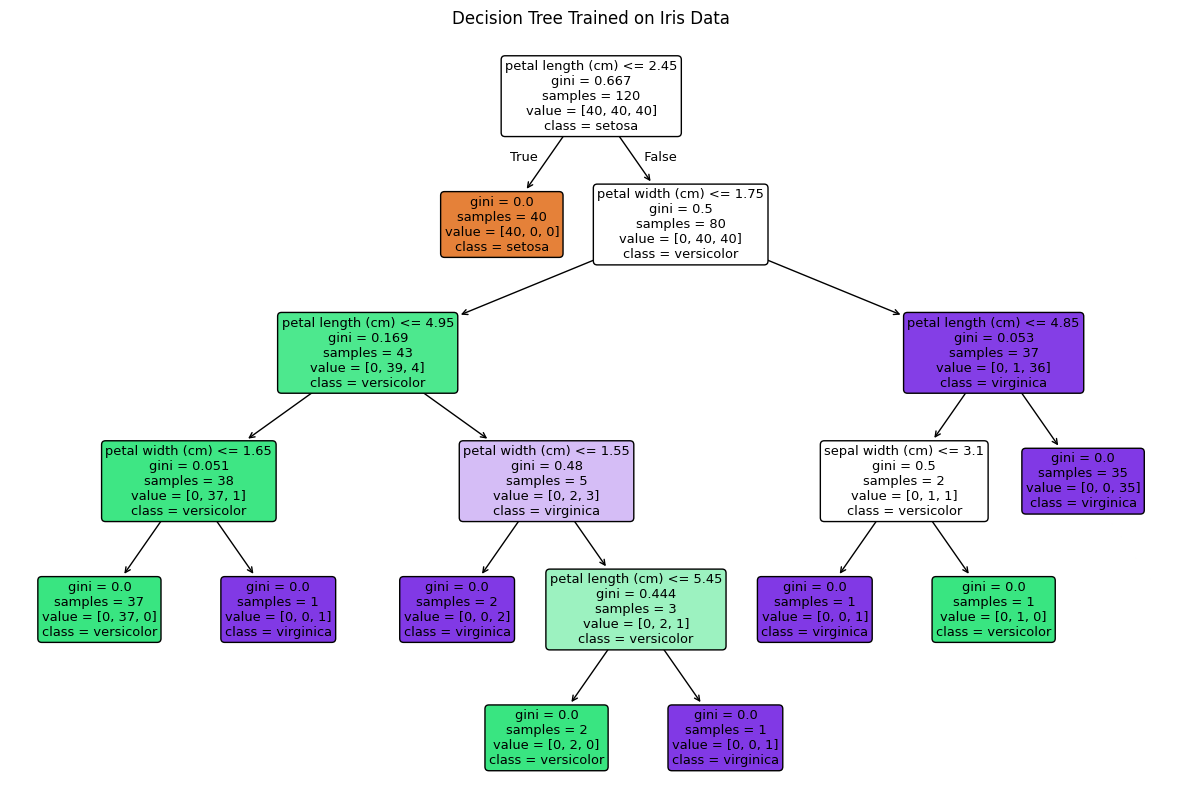

In [15]:
plt.figure(figsize=(15, 10))
plot_tree(tree_model, 
          feature_names=X.columns, 
          class_names=tree_model.classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree Trained on Iris Data")
plt.show()
